In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
#Constantes para comparação e calculos
electron_mass = 9.10938356e-31
electron_charge = 1.60217662e-19
planck_constant = 6.62607004e-34

In [3]:
#Funções gaussianas e de fit
def fit(data,funct,guess):
    def gaussian_fit(x,A,mean,sigma):
        return A*np.exp(-(x-mean)**2/(2*sigma**2))
    
    #fit gaussian to data
    from scipy.optimize import curve_fit
    popt, pcov = curve_fit(gaussian_fit, data, funct(data), p0=guess)
    print("FIT: ",popt)
    return popt

def gaussian(x,mean,sigma):
    return np.exp(-(x-mean)**2/(2*sigma**2))

def normalized_gaussian(x,mean,sigma):
    return gaussian(x,mean,sigma)/np.sqrt(2*np.pi*sigma**2)


In [4]:
#Função para calcular o produto de massa e carga de um elétron
def calculateME(a,da):
    a = a*1e-9
    da = da*1e-9
    sme = planck_constant/(np.sqrt(2)*a)
    dsme = planck_constant*da/(np.sqrt(2)*a**2)
    return (sme**2,2*sme*dsme)

FIT:  [6.78344238e-01 1.45994876e-49 2.13033926e-51]


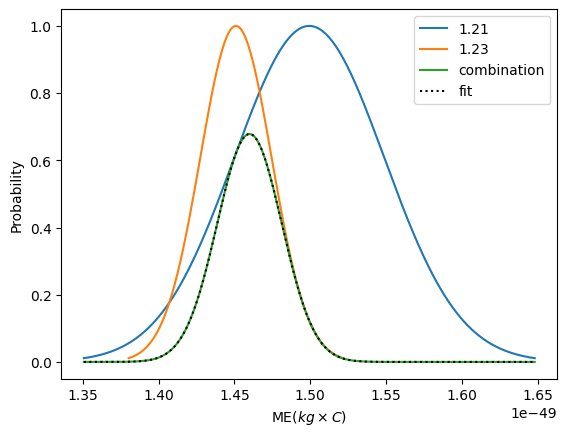

ME: 1.4599487589344352e-49 +/- 2.1303392626422316e-51
VALOR DE REFERENCIA
 1.4594841362444368e-49


In [5]:
# Calculos da Difração de elétrons. Nenhuma gaussiana aqui está normalizada!!
mean_1, sigma_1 = calculateME(1.21,0.02)
mean_2, sigma_2 = calculateME(1.23,0.01)

fig, ax = plt.subplots()
# Como tinhamos apenas duas gaussianas, fiz o produto delas com uma lambda function
product_gaussians = lambda x: gaussian(x,mean_1,sigma_1)*gaussian(x,mean_2,sigma_2)

x_1 = np.linspace(mean_1-3*sigma_1,mean_1+3*sigma_1,1000)
x_2 = np.linspace(mean_2-3*sigma_2,mean_2+3*sigma_2,1000)
ax.plot(x_1,gaussian(x_1,mean_1,sigma_1),label='1.21')
ax.plot(x_2,gaussian(x_2,mean_2,sigma_2),label='1.23')
ax.plot(x_1,product_gaussians(x_1),label='combination')
ax.set_xlabel(r'ME($kg \times C$)')
ax.set_ylabel('Probability')

#Fit da combinação de gaussianas para determinar a média e o desvio padrão
guesses = [np.max(product_gaussians(x_1)), x_1[np.argmax(product_gaussians(x_1))], sigma_1]
amax, mean, sigma = fit(x_1,product_gaussians,guesses)

#Plota fit da gaussiana combinada para comparação
ax.plot(x_1,amax*gaussian(x_1,mean,sigma),"k:",label='fit')
ax.legend()
plt.show()
print("ME:", mean, "+/-", sigma)
print("VALOR DE REFERENCIA\n", electron_mass*electron_charge)


FIT:  [ 1.11114267e-16  1.59850374e-19 -8.93311249e-22]


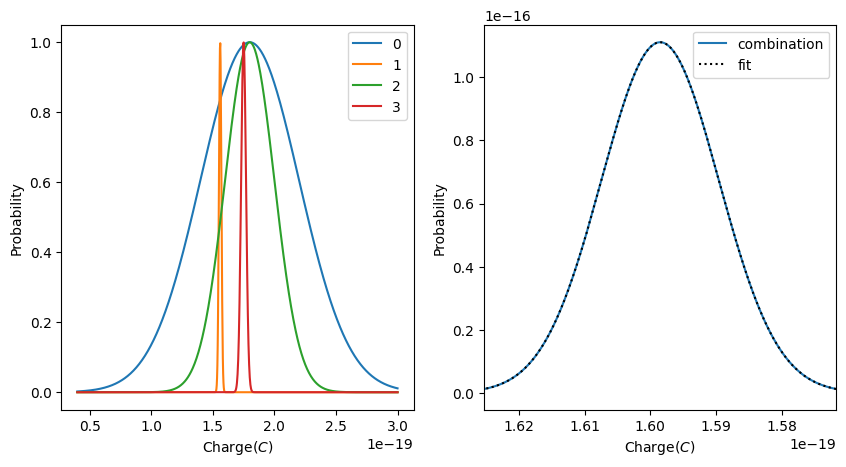

Charge: 1.598503740648379e-19 +/- -8.933112489671067e-22
VALOR DE REFERENCIA
 1.60217662e-19


In [18]:
#Experimento de Planck para determinação da carga do elétron

charges = np.array([1.8,1.56,1.8,1.75])*1e-19
errors = np.array([0.4,0.01,0.2,0.02])*1e-19

#Função para combinar as gaussianas das medidas de carga. Aqui as gaussianas estão normalizadas só pra visualizarmos melhor
def combination(x):
    y = 1;
    for i in range(len(charges)):
        y*=gaussian(x,charges[i],errors[i])
    return y

#Plot das gaussianas
x = np.linspace(0.4e-19,3e-19,1000)
fig, ax = plt.subplots(1,2,figsize=(10,5))

for i in range(len(charges)):
    ax[0].plot(x,gaussian(x,charges[i],errors[i]),label=str(i))
ax[0].legend()
ax[0].set_xlabel(r'Charge($C$)')
ax[0].set_ylabel('Probability')

#Plota combinação de gaussianas em outro eixo
x_comb = np.linspace(1.57e-19,1.63e-19,1000)
ax[1].plot(x_comb,combination(x_comb),label='combination')
ax[1].set_xlabel(r'Charge($C$)')
ax[1].set_ylabel('Probability')

#Fit da combinação de gaussianas para determinar a média e o desvio padrão
guesses = [np.max(combination(x_comb)), x[np.argmax(combination(x))], errors[0]]
amax, mean, sigma = fit(x_comb,combination,guesses)

#Plota fit da gaussiana combinada para comparação
ax[1].plot(x_comb,amax*np.exp(-(x_comb-mean)**2/(2*sigma**2)),"k:",label='fit')
ax[1].set_xlim(mean-3*sigma,mean+3*sigma)
ax[1].legend()
plt.show()

print("Charge:", mean, "+/-", sigma)
print("VALOR DE REFERENCIA\n", electron_charge)
